[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/upm-classes/image-understanding-2021-2022/blob/main/04_texture.ipynb)

# Entropy


In information theory, information entropy give information about the amount of information.

For a given neighborhood within an image, the local entropy gives information on how complex this neighborhood is. To define the neighborhood, a structuring element or filter is used. This filter makes it possible to detect variations in the local gray level distribution.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk

### Read image

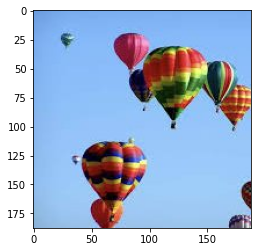

In [ ]:
image = cv2.imread('./globes_sq.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # obtain an RGB version

plt.imshow(image)
plt.show()

### Local entropy calculation

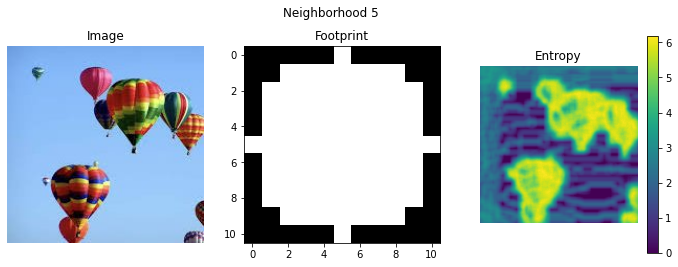

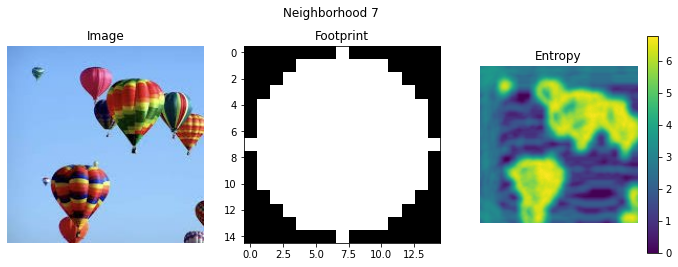

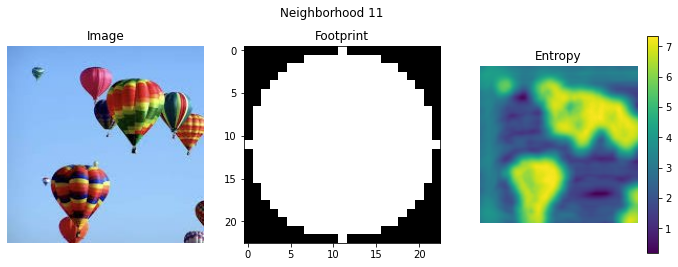

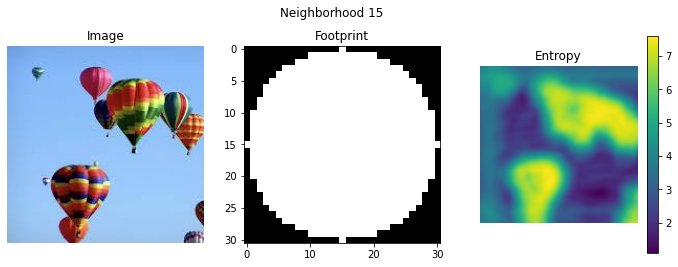

In [ ]:
filter_sizes = [5, 7, 11, 15]

for n in filter_sizes:

  footprint = disk(n) # Neighborhood in which entropy is calculated

  im = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  # Convert to gray scale
  e = entropy(im, footprint) # Calculate local entropy

  fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 4))
  fig.suptitle(f'Neighborhood {n}')

  ax1.imshow(image)
  ax1.set_title("Image")
  ax1.axis("off")

  ax2.imshow(footprint, cmap='gray')
  ax2.set_title("Footprint")

  colbar = ax3.imshow(e, cmap='viridis')
  ax3.set_title("Entropy")
  ax3.axis("off")
  fig.colorbar(colbar, ax=ax3)

  #fig.tight_layout()
  plt.show()

# GLCM Texture Features

 A GLCM describes the frequency of a gray level appearing in a specific spatial relationship with another gray value, within a given window area. 

It is a square matrix (𝐺) with dimension 𝑁𝑔, where 𝑁𝑔 is the number of gray levels in the image. 

Haralick parameters obtained from GLCM allow discriminating between textures. Some of the 14 Haralick parameters are: entropy, contrast, homogeneity, correlation or dissimilarity.

In this example, the spatial relation considered has been:
distance=[5] 
and angles=[0]

The dissimilarity and correlation of two different textures are extracted from an image: grassy areas and sky areas. 

This example illustrates the ability of the two calculated features to discrimate textures.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cv2

from skimage.feature import greycomatrix, greycoprops

### Read Image

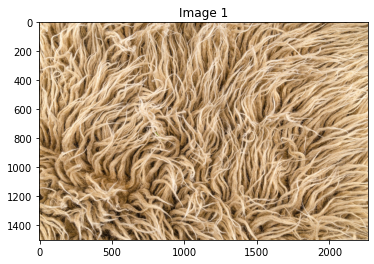

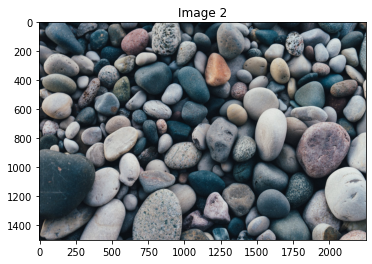

In [ ]:
image1 = cv2.imread('./texture_1.jpeg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB) # obtain an RGB version

image2 = cv2.imread('./texture_2.jpeg')
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB) # obtain an RGB version

plt.imshow(image1)
plt.title('Image 1')
plt.show()

plt.imshow(image2)
plt.title('Image 2')
plt.show()

#### GLCM

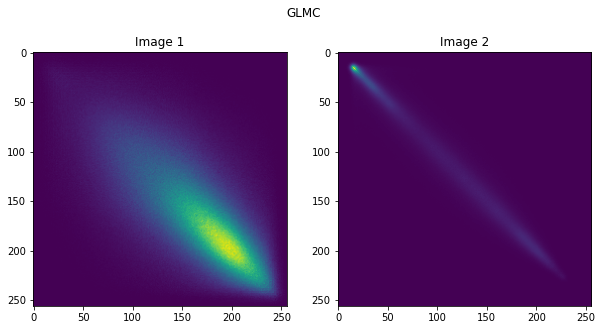

In [ ]:
distances = [5]
angles = [0]

im1 = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)  # Convert to gray scale
glcm1 = greycomatrix(im1, distances=distances, angles=angles, 
                     levels=256, symmetric=True, normed=True)

im2 = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)  # Convert to gray scale
glcm2 = greycomatrix(im2, distances=distances, angles=angles, 
                     levels=256, symmetric=True, normed=True)

# Plot images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('GLMC')
ax1.imshow(np.squeeze(glcm1), cmap='viridis')
ax1.set_title('Image 1')
ax2.imshow(np.squeeze(glcm2), cmap='viridis')
ax2.set_title('Image 2')
plt.show()

#### Textural Features

In [ ]:
dissimilarity_1 = greycoprops(glcm1, 'dissimilarity')[0, 0]
correlation_1 = greycoprops(glcm1, 'correlation')[0, 0]

dissimilarity_2 = greycoprops(glcm2, 'dissimilarity')[0, 0]
correlation_2 = greycoprops(glcm2, 'correlation')[0, 0]

print(f'Image 1. Dissimilarity: {dissimilarity_1}. Correlation {correlation_1}')
print(f'Image 2. Dissimilarity: {dissimilarity_2}. Correlation {correlation_2}')

Image 1. Dissimilarity: 30.501406784660766. Correlation 0.6632005646805365
Image 2. Dissimilarity: 13.439208314773587. Correlation 0.9298050536048516
